In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [2]:
train_data= pd.read_csv("train_data.csv")
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
#Shape of dataset
print(train_data.shape)

(614, 13)


In [4]:
train_data.dtypes


Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
train_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
train_data = train_data.drop("Loan_ID", axis =1)
train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
duplicate_rows_train_data = train_data[train_data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_train_data.shape)

#No duplicate rows found

number of duplicate rows:  (0, 12)


## Missing Value Analysis

In [8]:
# features that have missing values
features_with_na = [feature for feature in train_data.columns if train_data[feature].isnull().sum()>1]
print(features_with_na)

['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [9]:
# find percentage of missing values
for feature in features_with_na:
    print(feature, np.round(train_data[feature].isnull().sum()/len(train_data)*100,2), "% missing values")

Gender 2.12 % missing values
Married 0.49 % missing values
Dependents 2.44 % missing values
Self_Employed 5.21 % missing values
LoanAmount 3.58 % missing values
Loan_Amount_Term 2.28 % missing values
Credit_History 8.14 % missing values


In [10]:
print (len(train_data))

614


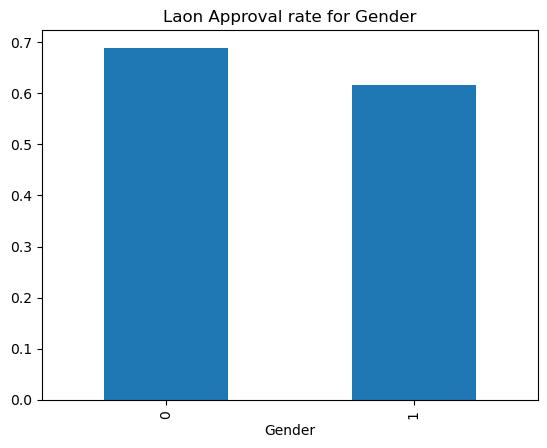

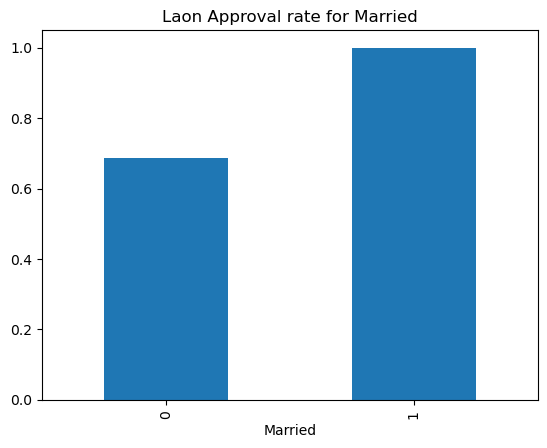

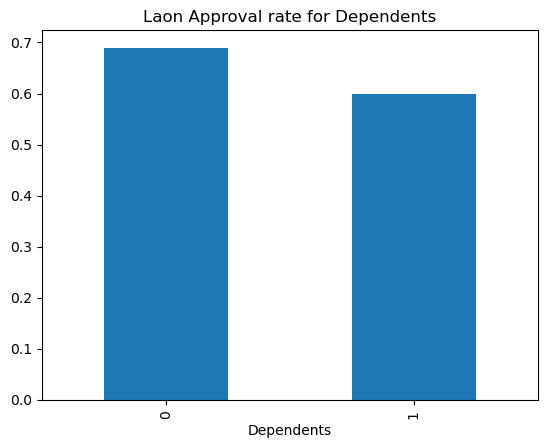

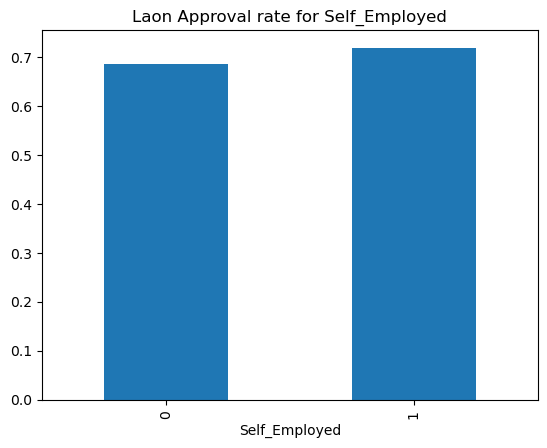

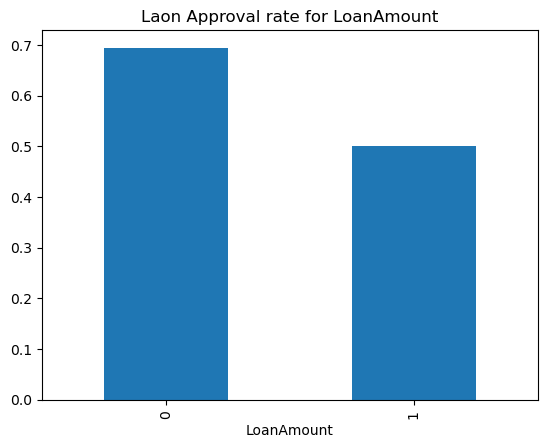

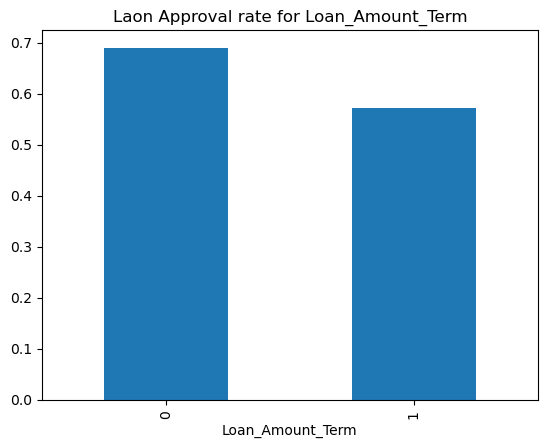

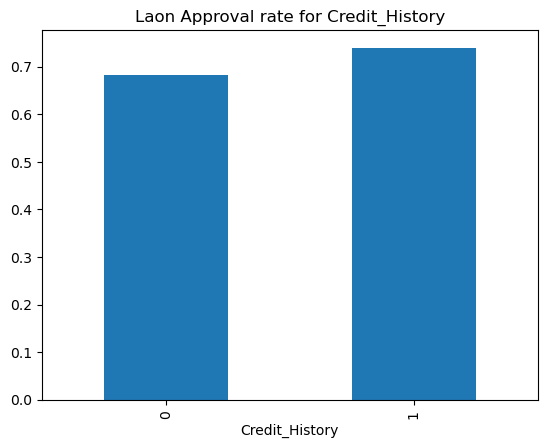

In [11]:
train_data_bin = train_data.copy()

# make the target variable binary 
train_data_bin["Loan_Status"]= np.where(train_data_bin['Loan_Status']=="Y", 1, 0)

# here we analyze the misisng values and normal values against the dependant variable
for feature in features_with_na:
    
    # Lets us make the columns into 1 and o based on missing values. if missing values, feature value =1 else 0 
    train_data_bin[feature] = np.where(train_data_bin[feature].isnull(),1,0)

    #Lets calculate mode of loan approvals against missing values
    train_data_bin.groupby(feature)['Loan_Status'].mean().plot.bar()
    plt.title("Laon Approval rate for " + feature)
    plt.show()

## We visualize the loan approval rate across each feature when they have missing values and when they dont 

### We see a few patterns in the above analysis
1. In some features the loan approval rate goes down when there are missing values
2. In some featutes loan approval rate goes up when there are missing values
3. At last, some features seem unaffected with Missing values

In [12]:
print(train_data_bin.groupby("Gender")['Loan_Status'].count())

Gender
0    601
1     13
Name: Loan_Status, dtype: int64


## Numerical Variables

In [13]:
numerical_features = [feature for feature in train_data if train_data[feature].dtypes!="O"]
print(numerical_features)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [14]:
#Find Discrete features

#Discrete features wont have a long range of numbers, so lets find numerical features with shorter range

discrete_features =  [feature for feature in numerical_features if len(train_data[feature].unique())<=25]
print(discrete_features)

['Loan_Amount_Term', 'Credit_History']


In [15]:
train_data[discrete_features]

,Loan_Amount_Term,Credit_History
0,360.0,1.0
1,360.0,1.0
2,360.0,1.0
3,360.0,1.0
4,360.0,1.0
...,...,...
609,360.0,1.0
610,180.0,1.0
611,360.0,1.0
612,360.0,1.0


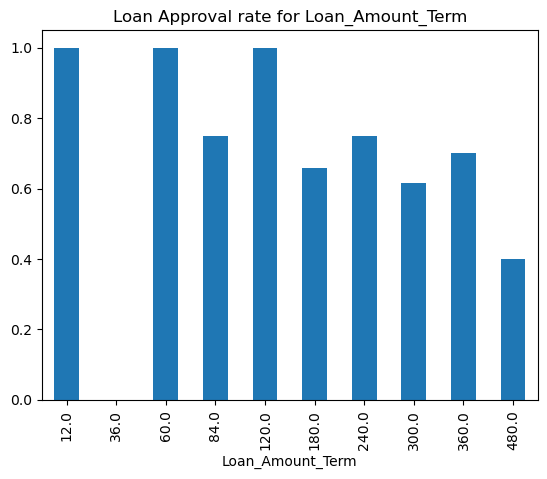

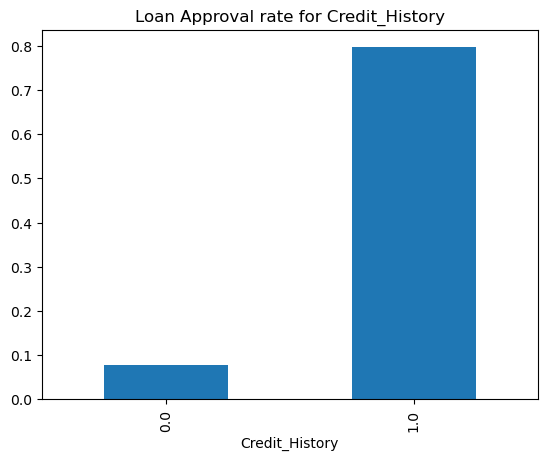

In [16]:
discrete_features_copy = train_data.copy()
discrete_features_copy['Loan_Status'] = np.where(discrete_features_copy['Loan_Status']=="Y",1,0)

# Plot the loan approval rate for discrete features
for feature in discrete_features:
    discrete_features_copy.groupby(feature)['Loan_Status'].mean().plot.bar()
    plt.title("Loan Approval rate for "+ feature)
    plt.show()


### Observations
- Loan approval rate is higher if the laon term is smaller
- Loan approval rate is higger if credit history meets guidelines flag is set to 1

## 

### Continous Features 

In [17]:
Continous_features = [feature for feature in numerical_features if feature not in discrete_features]
train_data[Continous_features].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,5849,0.0,NaN
1,4583,1508.0,128.0
2,3000,0.0,66.0
3,2583,2358.0,120.0
4,6000,0.0,141.0


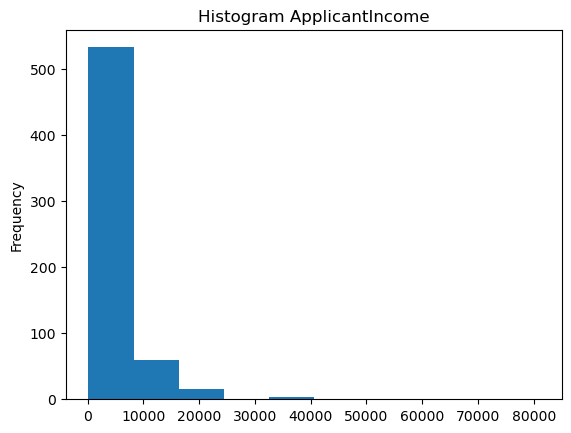

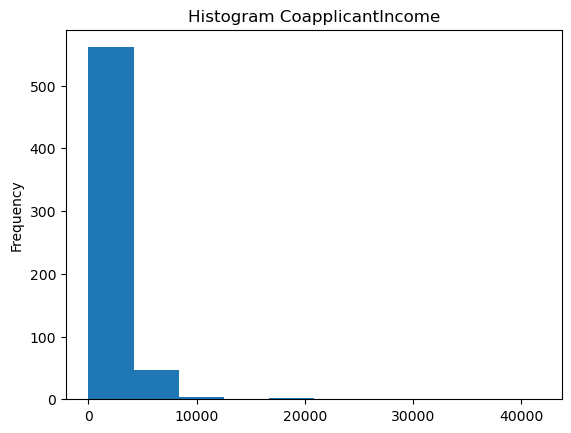

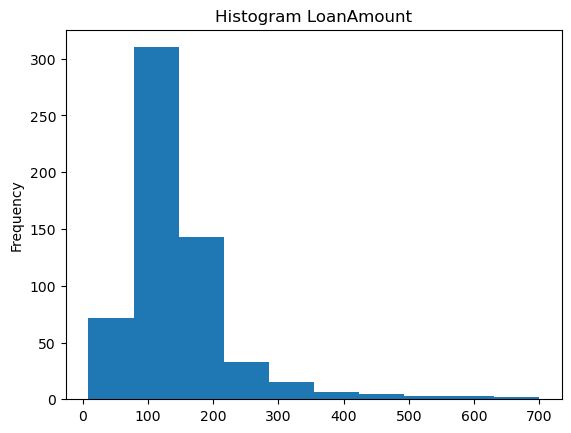

In [18]:
## Lets understand how each feature in itself is, Univariate  Anaylsis 

Continous_features_data = train_data.copy()

for feature in Continous_features:
    Continous_features_data[feature].plot.hist()
    plt.title("Histogram " + feature)
    plt.show()


The features Applicant income and Co applicant income follow log normal distribution, lets transform them,

but Co Applicants income column has 0 in the values, so we cant take log of that column

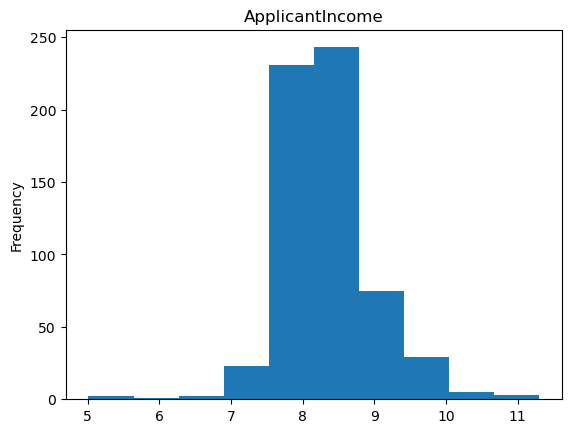

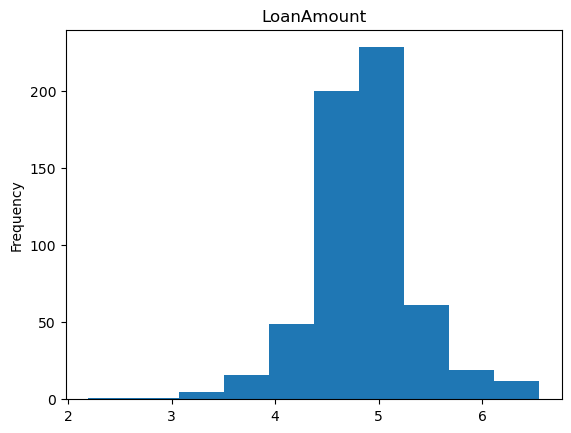

In [23]:
data = train_data.copy()

for feature in Continous_features:
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data[feature].plot.hist()
        plt.title(feature)
        plt.show()

### Find Outliers

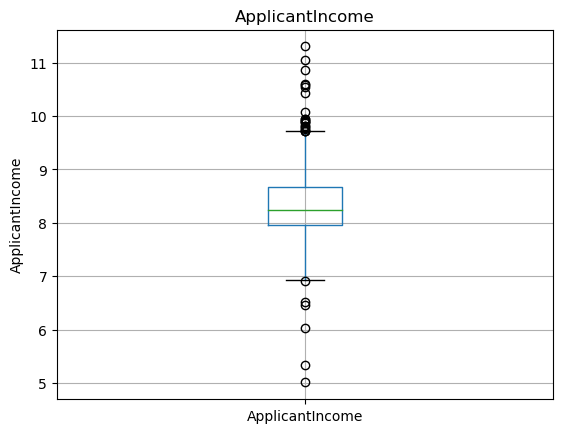

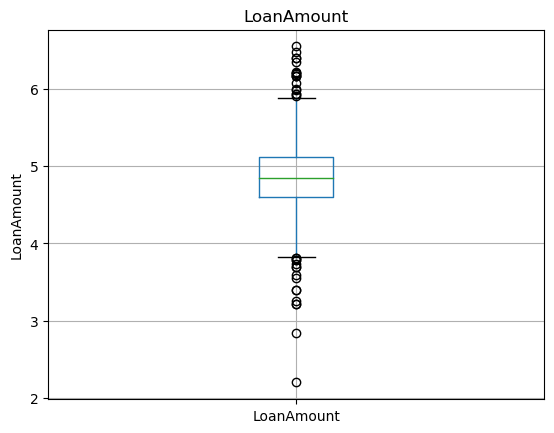

In [25]:
for feature in Continous_features:
    if 0 in data[feature].unique():
        pass
    else:
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()


## Categorical Variables

In [26]:
categorical_features = [feature for feature in train_data.columns if train_data[feature].dtype == 'O']
print(categorical_features)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [31]:
# find number of unique items in each column

for feature in categorical_features:
    print("the featute {} has total unqiues values of {}".format(feature, len(train_data[feature].unique())))

the featute Gender has total unqiues values of 3
the featute Married has total unqiues values of 3
the featute Dependents has total unqiues values of 5
the featute Education has total unqiues values of 2
the featute Self_Employed has total unqiues values of 3
the featute Property_Area has total unqiues values of 3
the featute Loan_Status has total unqiues values of 2


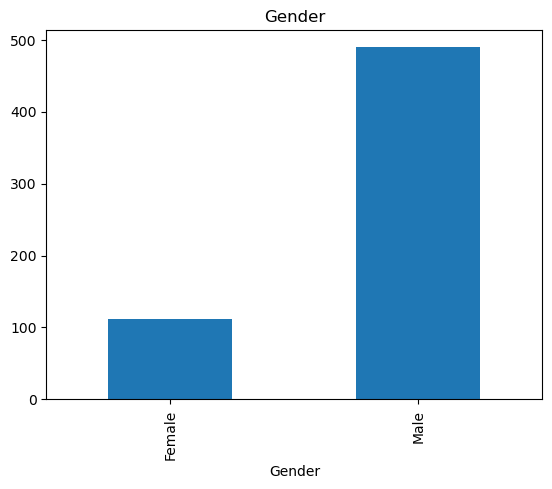

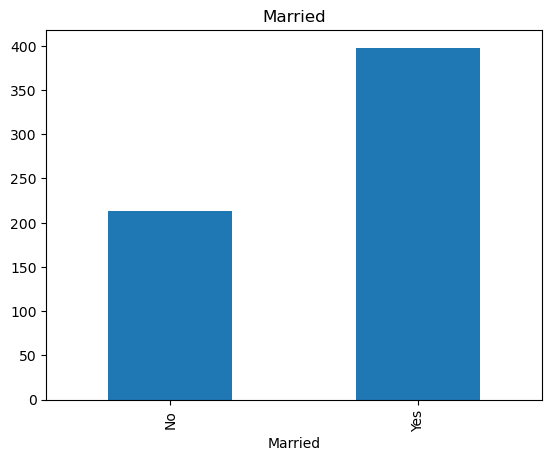

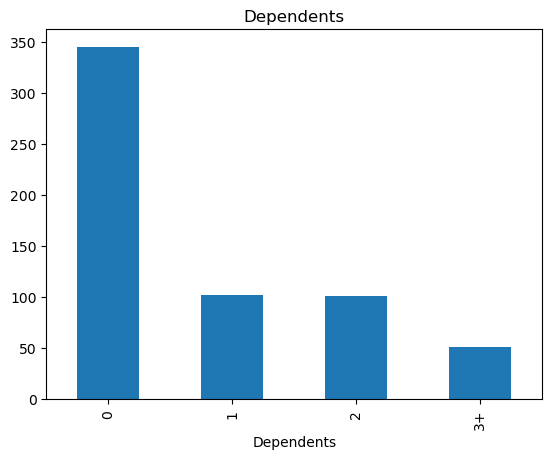

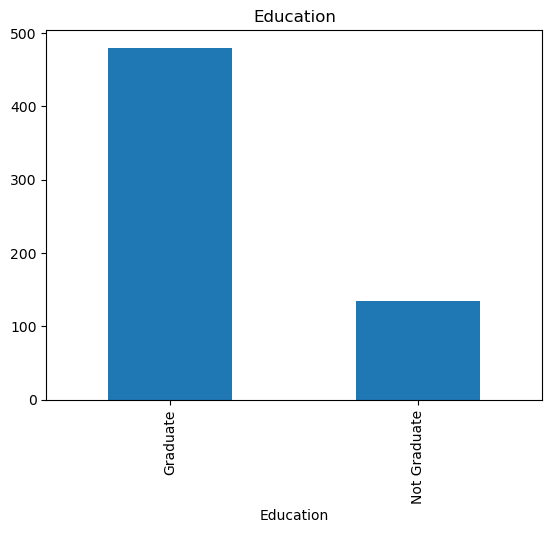

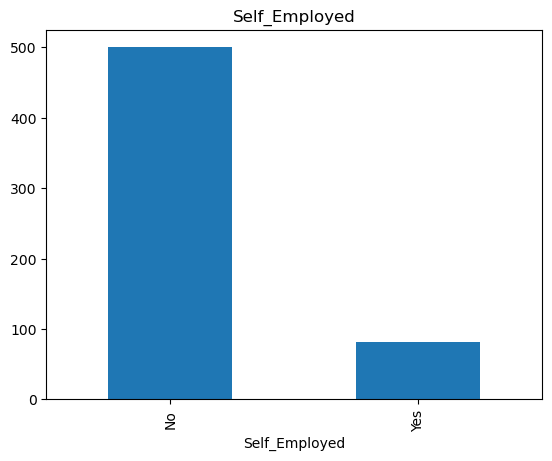

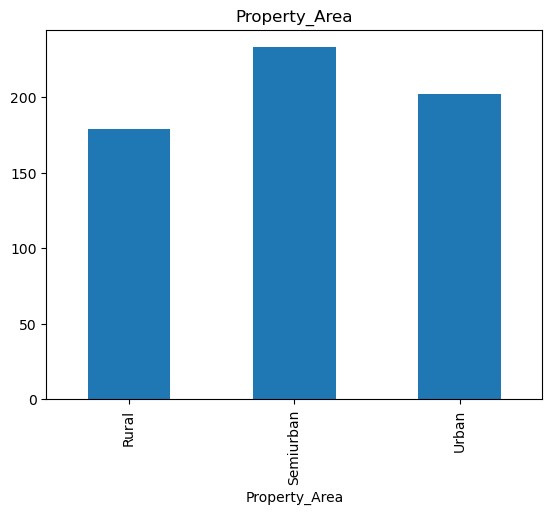

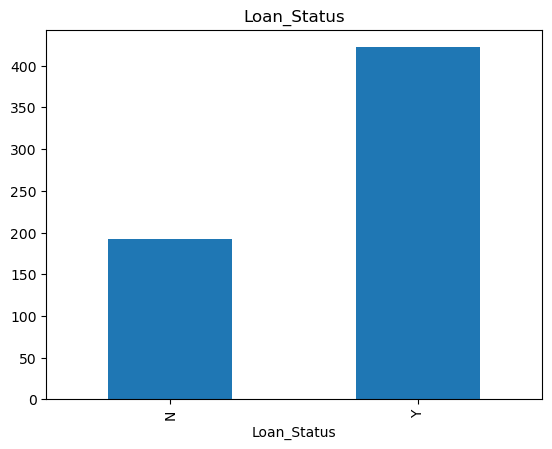

In [35]:
# find distribution of categorical variables
data = train_data.copy()

for feature in categorical_features:
    data.groupby(feature).size().plot.bar()
    plt.title(feature)
    plt.show()




We see that most of the applicants are male, martial status of the applicants is mostly married

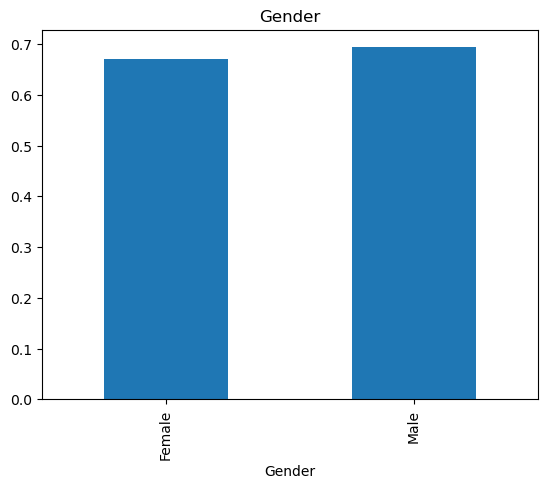

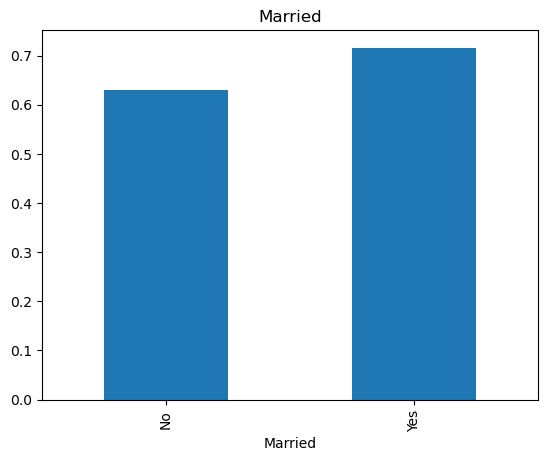

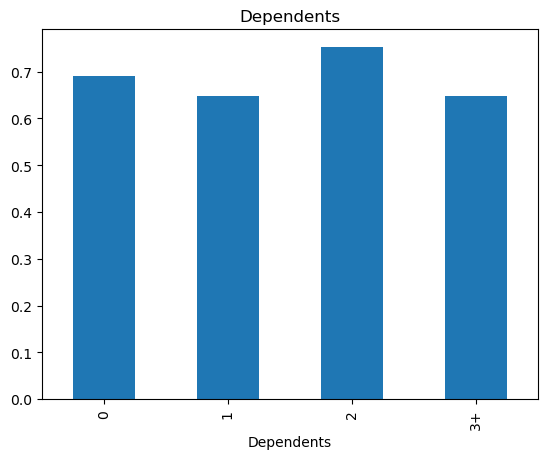

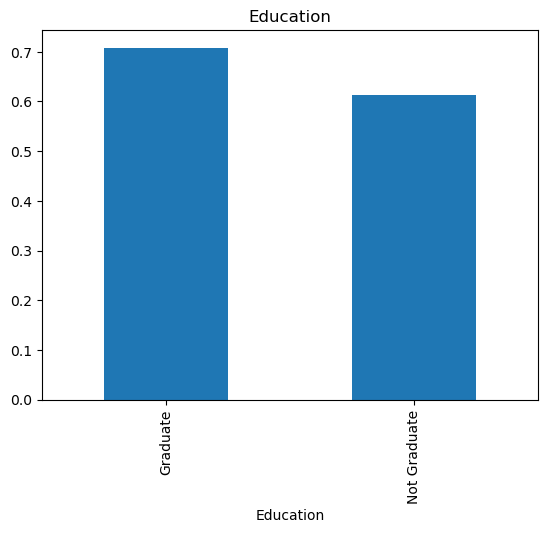

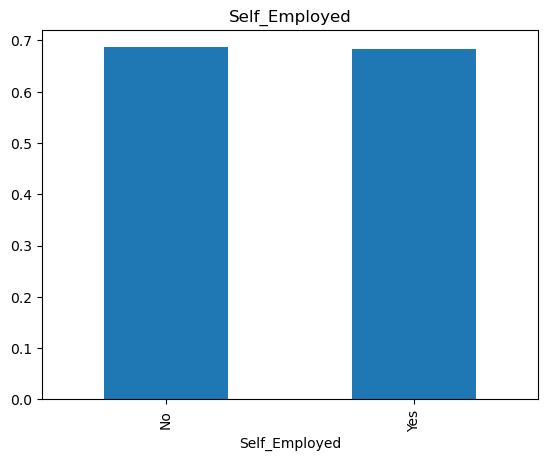

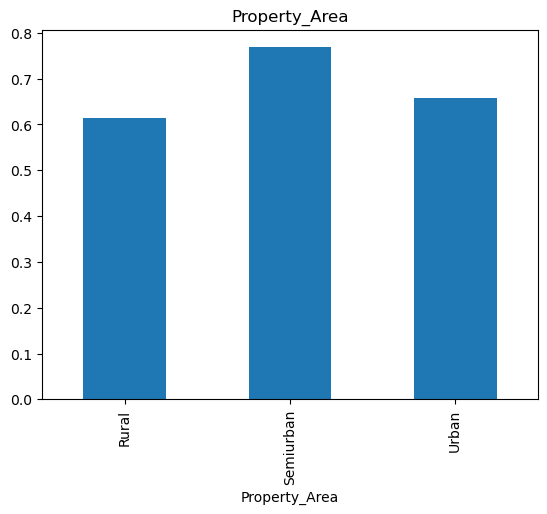

In [44]:
#Analyze the relation of categorical features with Target Variables

data = train_data.copy()
data['Loan_Status'] = np.where(data['Loan_Status']=="Y", 1, 0)

for feature in categorical_features:
    if feature == 'Loan_Status':
        pass
    else:
        data.groupby(feature)['Loan_Status'].mean().plot.bar()
        plt.title(feature)
        plt.show()

# Observarions
1. Loan Approval Rate (LAR) is higger for married appliacants
2. LAR is higher for graduate persons
3. LAR is higher if the property is semiurban 

#